# Installing and importing the libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy

# Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/credit_card_clients.csv', header = 1)
dataset.shape

(30000, 25)

In [ ]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
dataset['BILL TOTAL'] = dataset['BILL_AMT1'] + dataset['BILL_AMT2'] + dataset['BILL_AMT3'] + dataset['BILL_AMT4'] + dataset['BILL_AMT5'] + dataset['BILL_AMT6']

In [ ]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [ ]:
dataset['LIMIT_BAL'].mean()

167484.32266666667

In [ ]:
dataset['BILL TOTAL'].mean()

269861.6712

# Preprocessing the data

In [ ]:
X = dataset.iloc[:, [1, 25]].values

In [ ]:
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [ ]:
X.min(), X.max()

(-336259, 5263883)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X.min(), X.max()

(0.0, 1.0)

In [ ]:
X

array([[0.01010101, 0.06142041],
       [0.11111111, 0.06309411],
       [0.08080808, 0.07819659],
       ...,
       [0.02020202, 0.07263298],
       [0.07070707, 0.10765263],
       [0.04040404, 0.10127118]])

In [ ]:
X.shape

(30000, 2)

In [ ]:
X.T.shape

(2, 30000)

In [ ]:
X.T

array([[0.01010101, 0.11111111, 0.08080808, ..., 0.02020202, 0.07070707,
        0.04040404],
       [0.06142041, 0.06309411, 0.07819659, ..., 0.07263298, 0.10765263,
        0.10127118]])

# Clustering with Fuzzy c-means



In [ ]:
clustering = skfuzzy.cmeans(data = X.T, c = 5, m = 2, error = 0.005, maxiter = 1000, init=None)

In [ ]:
clustering

(array([[0.46176573, 0.10708831],
        [0.04080985, 0.08652721],
        [0.29902769, 0.08126692],
        [0.16260203, 0.08378892],
        [0.22752014, 0.24091562]]),
 array([[0.00686306, 0.01417072, 0.00860117, ..., 0.002999  , 0.00721578,
         0.00119786],
        [0.89894436, 0.32229428, 0.75210417, ..., 0.95235489, 0.82342121,
         0.97777916],
        [0.01686351, 0.04965477, 0.02635894, ..., 0.00755992, 0.02088892,
         0.00316134],
        [0.05953573, 0.57469982, 0.18678143, ..., 0.02883512, 0.12241729,
         0.01395954],
        [0.01779333, 0.03918041, 0.02615429, ..., 0.00825107, 0.0260568 ,
         0.0039021 ]]),
 array([[0.62208745, 0.36572865, 0.053983  , ..., 0.12309762, 0.1978505 ,
         0.30490852],
        [0.17142814, 0.16466795, 0.22746181, ..., 0.19203728, 0.19328202,
         0.03200292],
        [0.05910891, 0.10108198, 0.2373919 , ..., 0.2325802 , 0.34632583,
         0.27729274],
        [0.01001264, 0.29196182, 0.27650822, ..., 0.431428

In [ ]:
len(clustering)

7

In [ ]:
predictions = clustering[1]
predictions.shape

(5, 30000)

In [ ]:
predictions

array([[0.00686306, 0.01417072, 0.00860117, ..., 0.002999  , 0.00721578,
        0.00119786],
       [0.89894436, 0.32229428, 0.75210417, ..., 0.95235489, 0.82342121,
        0.97777916],
       [0.01686351, 0.04965477, 0.02635894, ..., 0.00755992, 0.02088892,
        0.00316134],
       [0.05953573, 0.57469982, 0.18678143, ..., 0.02883512, 0.12241729,
        0.01395954],
       [0.01779333, 0.03918041, 0.02615429, ..., 0.00825107, 0.0260568 ,
        0.0039021 ]])

In [ ]:
predictions[0][0], predictions[1][0], predictions[2][0], predictions[3][0], predictions[4][0]

(0.00686306276575217,
 0.8989443608941273,
 0.0168635121750601,
 0.05953573111682698,
 0.01779333304823361)

In [ ]:
predictions[0][0] + predictions[1][0] + predictions[2][0] + predictions[3][0] + predictions[4][0]

1.0000000000000002

In [ ]:
predictions = predictions.argmax(axis = 0)
predictions

array([1, 3, 1, ..., 1, 1, 1])

In [ ]:
np.unique(predictions, return_counts = True)

(array([0, 1, 2, 3, 4]), array([ 2010, 13082,  4105,  7614,  3189]))

In [ ]:
X

array([[0.01010101, 0.06142041],
       [0.11111111, 0.06309411],
       [0.08080808, 0.07819659],
       ...,
       [0.02020202, 0.07263298],
       [0.07070707, 0.10765263],
       [0.04040404, 0.10127118]])

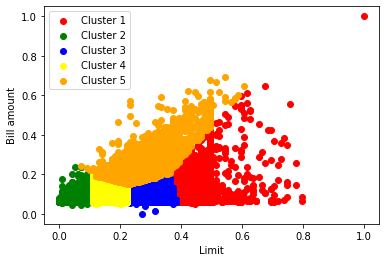

In [ ]:
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(X[predictions == 3, 0], X[predictions == 3, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X[predictions == 4, 0], X[predictions == 4, 1], c = 'orange', label = 'Cluster 5')
plt.xlabel('Limit')
plt.ylabel('Bill amount')
plt.legend();

# Choosing the number of clusters

In [ ]:
# Documentation: https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ['blue', 'orange', 'green', 'red', 'yellow', 'black', 'brown', 'cyan', 'magenta', 'forestgreen']
colors

['blue',
 'orange',
 'green',
 'red',
 'yellow',
 'black',
 'brown',
 'cyan',
 'magenta',
 'forestgreen']

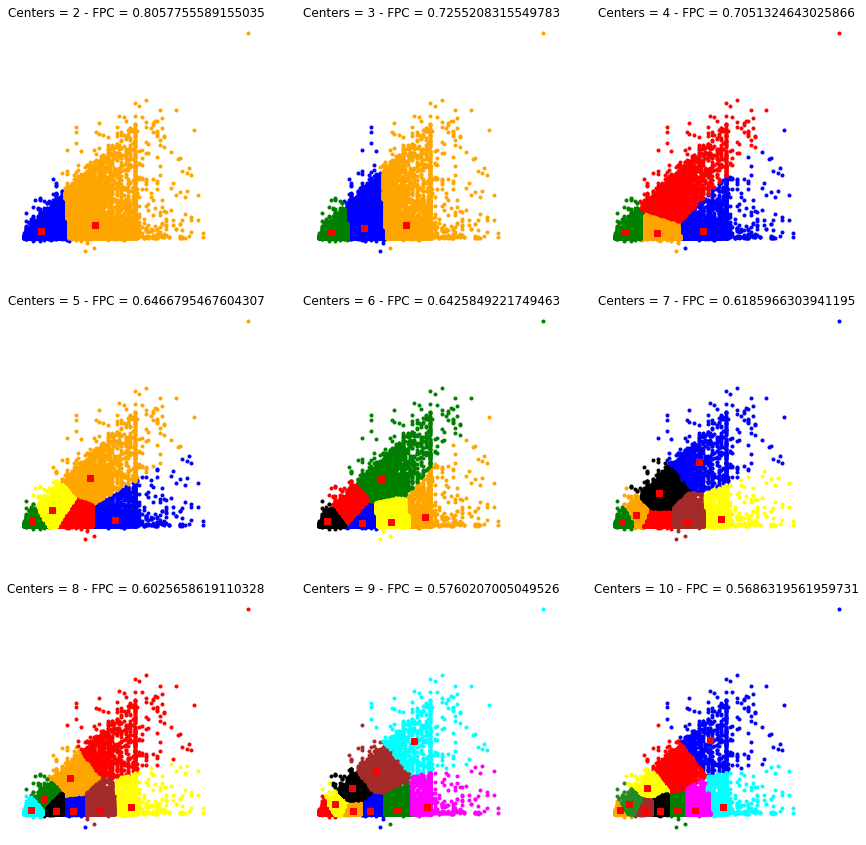

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
fpcs = []
for n_clusters, ax in enumerate(axes.reshape(-1), 2):
  #print(n_clusters)
  #print(ax)
  centers, predictions, _, _, _, _, fpc = skfuzzy.cmeans(data = X.T, c = n_clusters, m = 2, error = 0.005, maxiter = 1000, init=None)
  fpcs.append(fpc)

  predictions = np.argmax(predictions, axis = 0)
  for i in range(n_clusters):
    ax.plot(X[predictions == i, 0], X[predictions == i, 1], '.', color = colors[i])

  for center in centers:
    ax.plot(center[0], center[1], 'rs')

  ax.set_title('Centers = {} - FPC = {}'.format(n_clusters, fpc))
  ax.axis('off')

In [ ]:
fpcs

[0.8057752808216507,
 0.7255220695155127,
 0.7051323348107585,
 0.646524139309845,
 0.6425849229772386,
 0.61864150967327,
 0.6026331555701601,
 0.5900986704112732]

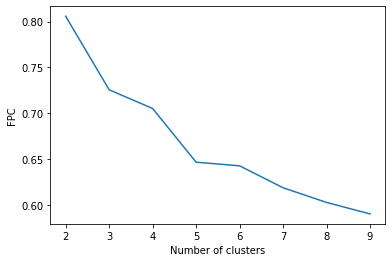

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(2,10), fpcs)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('FPC');

# Clustering using FPC

In [ ]:
clustering = skfuzzy.cmeans(data = X.T, c = 2, m = 2, error = 0.005, maxiter = 1000, init=None)

In [ ]:
predictions = clustering[1]
predictions = predictions.argmax(axis = 0)
predictions, np.unique(predictions, return_counts = True)

(array([0, 0, 0, ..., 0, 0, 0]), (array([0, 1]), array([20250,  9750])))

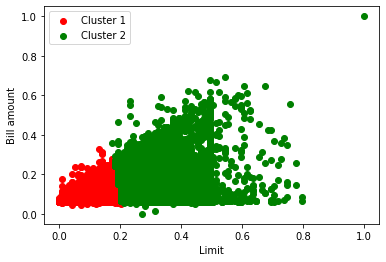

In [ ]:
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], c = 'green', label = 'Cluster 2')
plt.xlabel('Limit')
plt.ylabel('Bill amount')
plt.legend();

In [ ]:
centers = clustering[0]
centers

array([[0.0777621 , 0.09533236],
       [0.31603614, 0.12216985]])

In [ ]:
centers = scaler.inverse_transform(centers)
centers = pd.DataFrame(data = centers, columns = ['Limit', 'Bill amount'])
centers

,Limit,Bill amount
0,86984.482546,197615.727748
1,322875.782803,347909.480180


In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dataset_clusters = pd.concat([dataset, pd.DataFrame({'cluster': predictions})], axis = 1)
dataset_clusters

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL,cluster
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,7704,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,17077,0
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,101653,0
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,231334,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,109339,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,725349,1
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,21182,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,70496,0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,266611,0
